## TEWA 1 tutorial

regression modelling

*   Categorical predictors
*   Interactions
*   Training and test set
*   Reguralized regression: Ridge and lasso



### import libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import io, stats, linalg
import pandas as pd
from sklearn.linear_model import LinearRegression, Lasso, Ridge

### upload data -  kidiq.csv

source: Gelman et al (2021). Regression and other stories

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving kidiq.csv to kidiq.csv


### load data to workspace

In [ ]:
data = pd.read_csv("kidiq.csv")

## print data table, explore number of potential predictors, data-set size

In [ ]:
print(np.shape(data))
data

(434, 5)


,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27
...,...,...,...,...,...
429,94,0,84.877412,4,21
430,76,1,92.990392,4,23
431,50,0,94.859708,2,24
432,88,1,96.856624,2,21


In [ ]:
data.corr()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
kid_score,1.000000,0.236916,0.448276,0.087528,0.091998
mom_hs,0.236916,1.000000,0.282709,0.253910,0.214528
mom_iq,0.448276,0.282709,1.000000,0.114803,0.091608
mom_work,0.087528,0.253910,0.114803,1.000000,0.135598
mom_age,0.091998,0.214528,0.091608,0.135598,1.000000


### Visualize some of the data

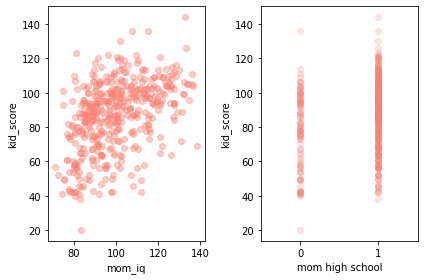

In [ ]:
fig, ax = plt.subplots(ncols=2)
ax[0].scatter(data["mom_iq"], data["kid_score"], color="salmon", alpha=0.4)
ax[0].set_xlabel("mom_iq")
ax[0].set_ylabel("kid_score")

ax[1].scatter(data["mom_hs"], data["kid_score"], alpha=0.2, color="salmon")
ax[1].set_xlabel("mom high school")
ax[1].set_ylabel("kid_score")
ax[1].set_xticks([0, 1])

ax[1].set_xlim([-0.5, 1.5])
plt.tight_layout()

## fit a linear regression, using two predictors 'mom_hs' and 'mom_iq'

In [ ]:
x = np.column_stack((data["mom_iq"], data["mom_hs"]))

In [ ]:
lr = linear_regression()
lr.fit(x, data["kid_score"])

LinearRegression()

 ### check the predictor weigths, and the score of the model


In [ ]:
print("intercept", lr.intercept_)
print("weights/slopes", lr.coef_)
print("score: ", lr.score(x, data["kid_score"]))

intercept 25.731538175096077
weights/slopes [0.56390605 5.95011691]
score:  0.21414651708983612


### visualize predictions and true data



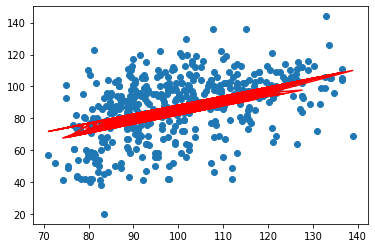

In [ ]:
plt.scatter(data["mom_iq"], data["kid_score"])

ypred = lr.predict(x)
plt.plot(data["mom_iq"], ypred, color="r")

In [ ]:
x

array([[121.1175286 ,   1.        ],
       [ 89.36188171,   1.        ],
       [115.44316488,   1.        ],
       [ 99.44963944,   1.        ],
       [ 92.74571   ,   1.        ],
       [107.90183776,   0.        ],
       [138.89310607,   1.        ],
       [125.14511948,   1.        ],
       [ 81.61952618,   1.        ],
       [ 95.07306862,   1.        ],
       [ 88.57699772,   1.        ],
       [ 94.85970819,   1.        ],
       [ 88.96280085,   1.        ],
       [114.11429701,   1.        ],
       [100.53407192,   0.        ],
       [120.41914559,   1.        ],
       [114.42687689,   1.        ],
       [111.59235758,   1.        ],
       [133.84922721,   1.        ],
       [ 97.26480106,   0.        ],
       [110.09680614,   1.        ],
       [126.72399417,   1.        ],
       [ 97.91159031,   1.        ],
       [ 99.92572516,   1.        ],
       [ 97.59500805,   0.        ],
       [121.74801346,   1.        ],
       [ 98.7480787 ,   1.        ],
 

### solution 1--indexing

Text(0, 0.5, 'kid_score')

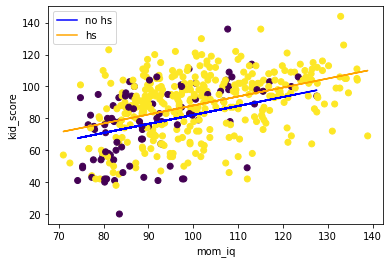

In [ ]:
pred_no_high_school = lr.predict(x[x[:, 1] == 0, :])
pred_high_school = lr.predict(x[x[:, 1] == 1, :])
plt.scatter(data["mom_iq"], data["kid_score"], c=data["mom_hs"])
plt.plot(x[x[:, 1] == 0, 0], pred_no_high_school, label="no hs", color="blue")
plt.plot(x[x[:, 1] == 1, 0], pred_high_school, label="hs", color="orange")
plt.legend()
plt.xlabel("mom_iq")
plt.ylabel("kid_score")

#### solution 2--  set up design matrix for prediciton

[[ 66.   0.]
 [140.   0.]]
[[ 66.   1.]
 [140.   1.]]


Text(0, 0.5, 'kid_score')

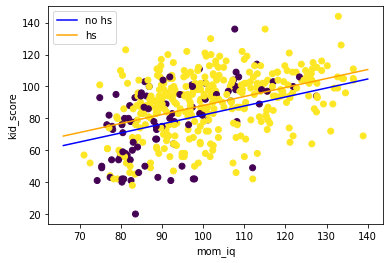

In [ ]:
xs = np.array([66, 140])
x_no_hs = np.column_stack((xs, np.zeros(2)))
print(x_no_hs)
xhs = np.column_stack((xs, np.ones(2)))
print(xhs)

pred_no_high_school = lr.predict(x_no_hs)
pred_high_school = lr.predict(xhs)

plt.scatter(data["mom_iq"], data["kid_score"], c=data["mom_hs"])
plt.plot(xs, pred_no_high_school, label="no hs", color="blue")
plt.plot(xs, pred_high_school, label="hs", color="orange")
plt.legend()
plt.xlabel("mom_iq")
plt.ylabel("kid_score")

### solution 3--indexing + for loop for groups

Text(0, 0.5, 'kid_score')

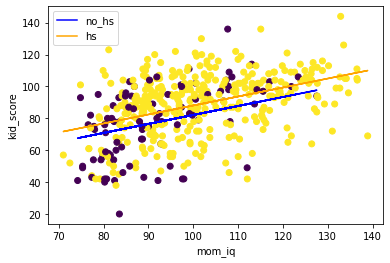

In [ ]:
education = ["no_hs", "hs"]
colors = ["blue", "orange"]
plt.scatter(data["mom_iq"], data["kid_score"], c=data["mom_hs"])
for ce, e in enumerate(education):
    prediciton = lr.predict(x[x[:, 1] == ce, :])
    plt.plot(x[x[:, 1] == ce, 0], prediciton, label=e, color=colors[ce])
plt.legend()
plt.xlabel("mom_iq")
plt.ylabel("kid_score")

## model with interaction

make a new design matrix, that included a column for the interaction between momhs and mom_iq

fit the model and visualize the model prediciton

In [ ]:
x2 = np.column_stack((data["mom_iq"], data["mom_hs"], data["mom_iq"] * data["mom_hs"]))
print("design matrix with interaction")
print(x2[:10, :])

design matrix with interaction
[[121.1175286    1.         121.1175286 ]
 [ 89.36188171   1.          89.36188171]
 [115.44316488   1.         115.44316488]
 [ 99.44963944   1.          99.44963944]
 [ 92.74571      1.          92.74571   ]
 [107.90183776   0.           0.        ]
 [138.89310607   1.         138.89310607]
 [125.14511948   1.         125.14511948]
 [ 81.61952618   1.          81.61952618]
 [ 95.07306862   1.          95.07306862]]


In [ ]:
lr.fit(x2, data["kid_score"])
print(lr.coef_)
print(lr.intercept_)
print(lr.score(x2, data["kid_score"]))

[ 0.96888921 51.26822343 -0.48427467]
-11.482021142024365
0.23010362792143824


Text(0, 0.5, 'kid_score')

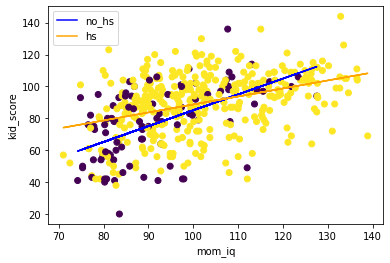

In [ ]:
education = ["no_hs", "hs"]
colors = ["blue", "orange"]
plt.scatter(data["mom_iq"], data["kid_score"], c=data["mom_hs"])
for ce, e in enumerate(education):
    prediciton = lr.predict(x2[x2[:, 1] == ce, :])
    plt.plot(x2[x2[:, 1] == ce, 0], prediciton, label=e, color=colors[ce])
plt.legend()
plt.xlabel("mom_iq")
plt.ylabel("kid_score")

 ## Training and test set

seprate the X and Y data, into an 80% training and 20% test set using indexing
for now, it is okay, just to take the first 80% of data as training and the last 20% as test data  
(this is clearly a wrong approach if the data is ordered)




In [ ]:
n = len(data["kid_score"])
print(n)
np.shape(x2[: int(n * 0.8), :])
train_x = x2[0 : int(n * 0.8), :]
train_y = data["kid_score"][0 : int(n * 0.8)]

test_x = x2[int(n * 0.8) :, :]
test_y = data["kid_score"][int(n * 0.8) :]

434


In [ ]:
lr.fit(train_x, train_y)

LinearRegression()

In [ ]:
print(lr.score(train_x, train_y))
print(lr.score(test_x, test_y))

0.23910704839196617
0.1119777051694123


## fit the regression model (with interaction term) on the training set, and calculate the score for both the training and the test sets

(randomly selected 80% and 20% test set)

## Mean Centering and standardization

1. Mean center your data (make a new design matrix for this), and fit and score the model again.

2. Standardize your data, and fit again the model with interaction.
see how the obtained coefficients and score change



## Regularized regression


test Lasso and Ridge regression on the test and training data from above

see how the score changes, but also how the regression weights (Betas) are influenced.

note: ridge and lasso work well with standardized data.


## Systematic exploration of Lasso and Ridge

change the Regularization strength alpha systematically for different values.
see how this influnces the obtained scores and weigths (both for Lasso and Ridge)


Visualize the result of this investigation





to make more general conclusions, we would need to repeat the training - test serpation mulitple times randomly, and integrate the behavior of lasso and ridge across these mulitple divisions